### GMM (Gaussian Mixture Model)
- 여러개의 가우시안 분포를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정하에 군집화를 수행
- 거리기반이 아닌 데이터 밀도기반

### GMM 을 이용한 붓꽃 데이터 세트 군집화

In [2]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
iris = load_iris()

In [6]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
gmm = GaussianMixture(n_components=3, random_state=0)
cluster_labels = gmm.fit(iris.data).predict(iris.data)

In [11]:
np.unique(cluster_labels, return_counts=True)

(array([0, 1, 2], dtype=int64), array([50, 45, 55], dtype=int64))

In [12]:
iris_df['gmm_cluster']= cluster_labels

In [19]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,gmm_cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [20]:
iris_df.groupby('target')['gmm_cluster'].value_counts()

target  gmm_cluster
0       0              50
1       1              45
        2               5
2       2              50
Name: gmm_cluster, dtype: int64

꽤 잘 분류되었다. KMeans 로 돌려봤을 때 어떤지 비교해보자

In [21]:
kmeans = KMeans(
      n_clusters=3
    , init = 'k-means++'
    , max_iter= 300
    , random_state=0
)
cluster_labels = kmeans.fit(iris.data).predict(iris.data)

In [22]:
iris_df['kmeans_cluster'] = cluster_labels
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,gmm_cluster,kmeans_cluster
0,5.1,3.5,1.4,0.2,0,0,1
1,4.9,3.0,1.4,0.2,0,0,1
2,4.7,3.2,1.3,0.2,0,0,1
3,4.6,3.1,1.5,0.2,0,0,1
4,5.0,3.6,1.4,0.2,0,0,1


In [24]:
print(iris_df.groupby('target')['gmm_cluster'].value_counts())

print(iris_df.groupby('target')['kmeans_cluster'].value_counts())

target  gmm_cluster
0       0              50
1       1              45
        2               5
2       2              50
Name: gmm_cluster, dtype: int64
target  kmeans_cluster
0       1                 50
1       2                 48
        0                  2
2       0                 36
        2                 14
Name: kmeans_cluster, dtype: int64


- 1,2 레이블에 대하여 위의 GMM보다 Kmeans의 분류성능이 떨어진다. 붓꽃 데이터 세트에는 GMM을 이용한 군집화가 더 적합하다.

In [30]:
# 시각화 함수
# 클러스터링 결과를 담은 DataFrame과 클러스터 모델을 인자로 받음
# 클러스터링 결과를 시각화

# clusterobj : fitting 완료된 군집 모델 객체
# label_name : ex) kmeans_cluster, gmm_cluster
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter:
        centers = clusterobj.cluster_centers_   # 군집 레이블 중심좌표
    
    unique_labels = np.unique(dataframe[label_name].values)
    
    markers = ['o','s','^','x','*']   # 5개의 중심점까지 군집화 시각화
    
    isNoise = False
    
    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label==-1:    # label = -1 : 잡음(군집대상에서 빠진 아이, DBSCAN에서 사용하기 위해 미리 만들어둠)
            cluster_legend = 'Noise'
            isNoise = True
        else:
            cluster_legend = 'Cluster' +str(label) # 범례에 표시할 문자열
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2']
                   , s=70, edgecolors='k', marker=markers[label], label = cluster_legend
                   )   # 하드코딩되어있어서 좋은 코드는 아니다.
        
        # 중심좌표 출력 코드 추가하기 
        # if iscenter
        
        
    if isNoise:
        legend_loc = 'upper center'  # 범례위치
    else : 
        legend_loc = 'upper right'
    
    plt.legend()
    plt.show()
            

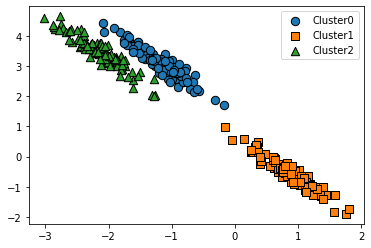

In [31]:
# 데이터 생성, Transformation 
# 1. 기본데이터(blobs)
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 2. 데이터의 선형변환 : 행렬 내적곱을 통해 변환
transformation = [[0.60834549,-0.63667341],[-0.40887718,0.85253229]]  # 임의의 값으로 지정

X_aniso = np.dot(X, transformation)

# 위 데이터를 데이터 프레임으로 생성하기
cluster_df = pd.DataFrame(data=X_aniso, columns=['ftr1','ftr2'])   # 위에서 생성한 시각화함수에 적용을 위해 컬럼명을 ftr1, ftr2 로.
cluster_df['target']= y

# 선형 변환하여 생성한 데이터의 시각화
visualize_cluster_plot(None, cluster_df, 'target', iscenter=False)

위의 분포를 가지는 데이터를 Kmeans와 GMM으로 군집화후 비교

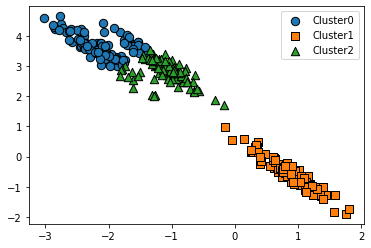

In [33]:
# KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
cluster_df['kmeans_label']=kmeans_label
visualize_cluster_plot(kmeans, cluster_df, 'kmeans_label', iscenter=False)

- 0,2 클러스터가 서로 섞여있다.

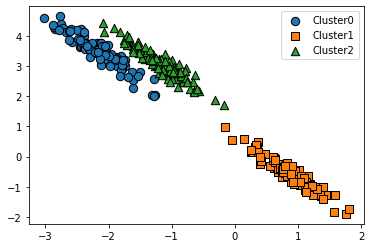

In [34]:
# GMM
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit_predict(X_aniso)
cluster_df['gmm_label']=gmm_label
visualize_cluster_plot(gmm, cluster_df, 'gmm_label', iscenter=False)

-GMM에 의해 잘 군집화되었다

In [36]:
# 수치적 확인
print('### KMeans Clustering ###')
result = cluster_df.groupby('target')['kmeans_label'].value_counts()
print(result)


print('### GMM Clustering ###')
result = cluster_df.groupby('target')['gmm_label'].value_counts()
print(result)

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64
### GMM Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


- GMM 은 완벽하게 분리되었다.